In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import os

os.chdir(r"C:\Users\Admin\Desktop\feature selection by lasso regression")

In [3]:
data=pd.read_csv(r"HousingData.csv")
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df=data.copy()

In [5]:
df.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
df.shape

(506, 14)

In [9]:
fill_nan=df["CRIM"].fillna(value=0,inplace=True)
fill_nan=df["ZN"].fillna(value=0,inplace=True)
fill_nan=df['INDUS'].fillna(value=0,inplace=True)
fill_nan=df["CHAS"].fillna(value=0,inplace=True)
fill_nan=df["AGE"].fillna(value=0,inplace=True)
fill_nan=df["LSTAT"].fillna(value=0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\562473624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_nan=df["CRIM"].fillna(value=0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\562473624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
x=df.drop('MEDV',axis=1)
y=df["MEDV"].values

In [11]:
x.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,0.0,2.5050,1,273,21.0,396.90,7.88


In [14]:
names=df.columns.drop('MEDV')
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [15]:
len(names)

13

In [16]:
lasso=Lasso(alpha=0.1)
lasso.fit(x,y)

Lasso(alpha=0.1)

In [17]:
coeff=lasso.coef_
coeff

array([-0.10827023,  0.0484652 , -0.05798282,  1.41597717, -0.        ,
        4.26006424, -0.02141141, -1.10335645,  0.24850677, -0.01418573,
       -0.79946215,  0.01034894, -0.43173415])

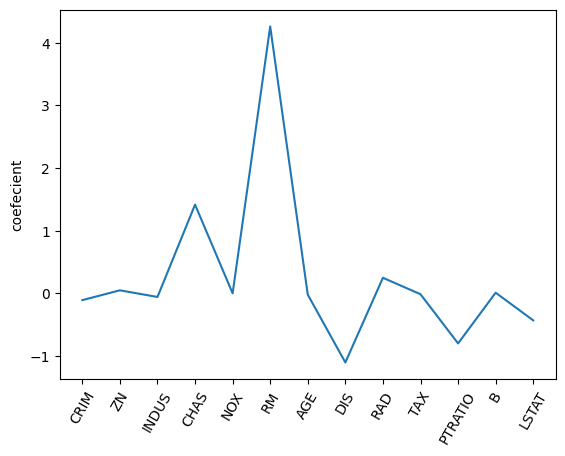

In [20]:
plt.plot(range(len(names)),coeff)
plt.xticks(range(len(names)),names,rotation=60)
plt.ylabel('coefecient')
plt.show()

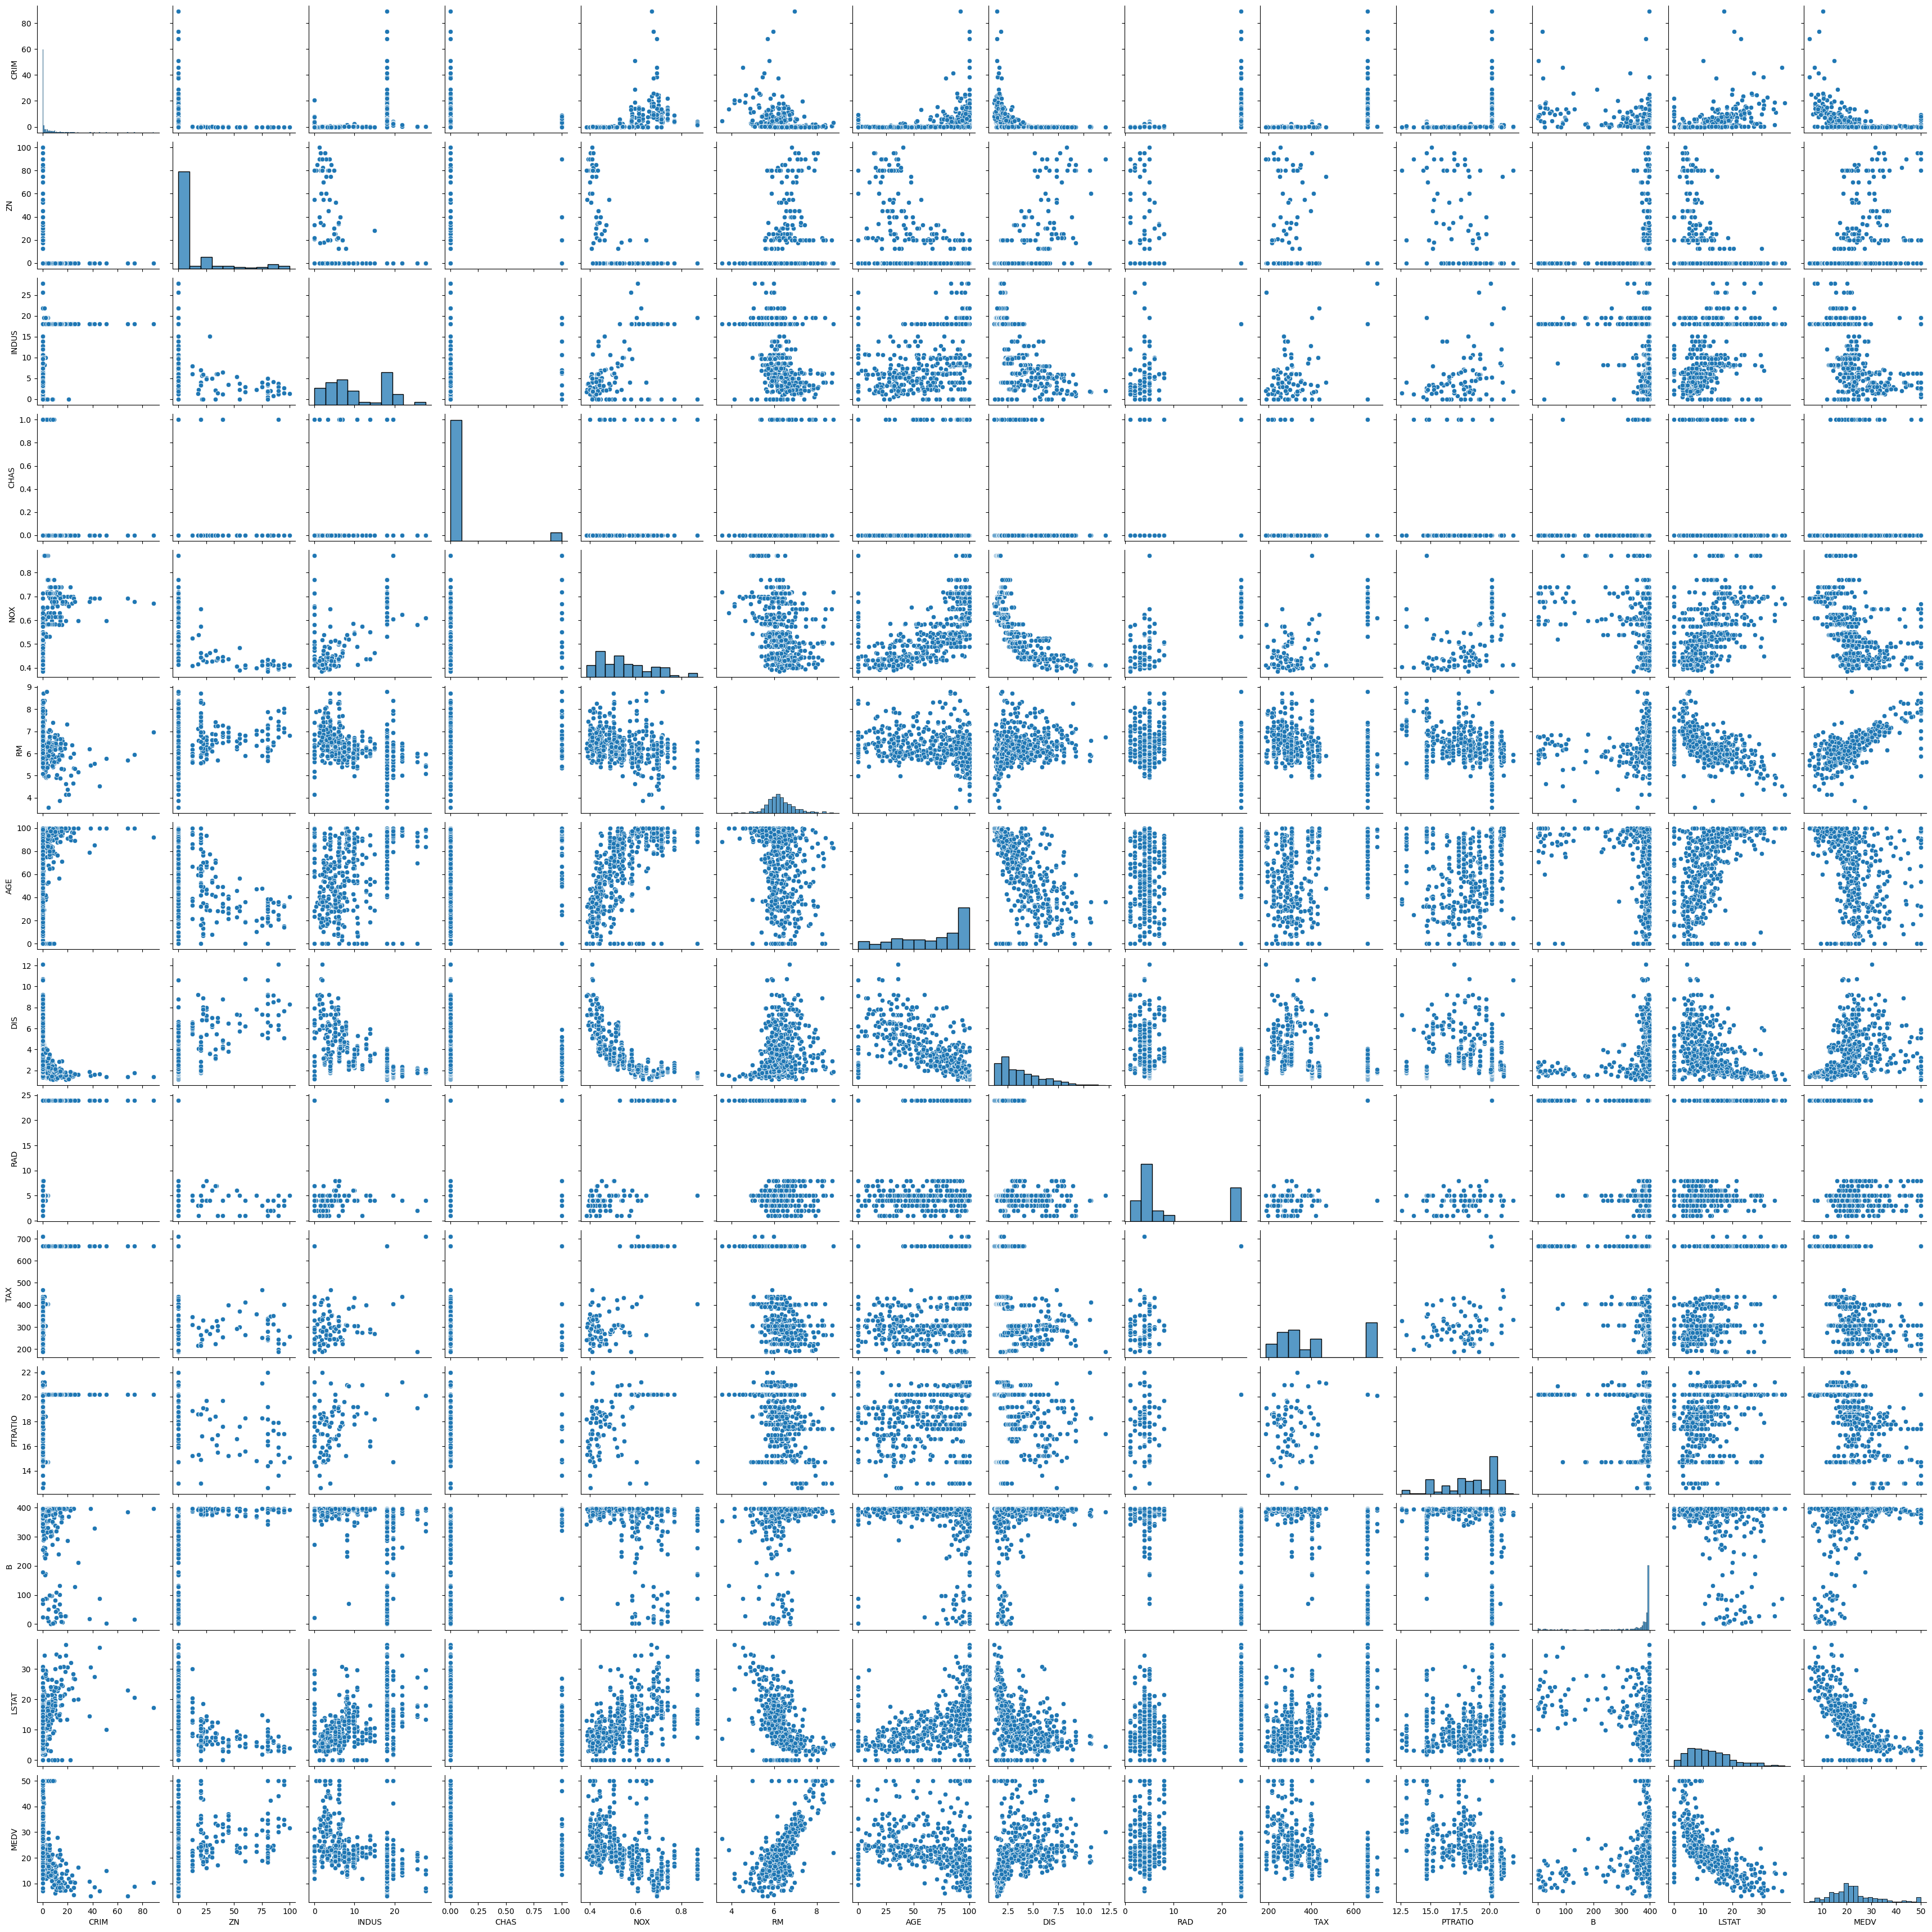

In [21]:
import seaborn as sns
sns.pairplot(df)

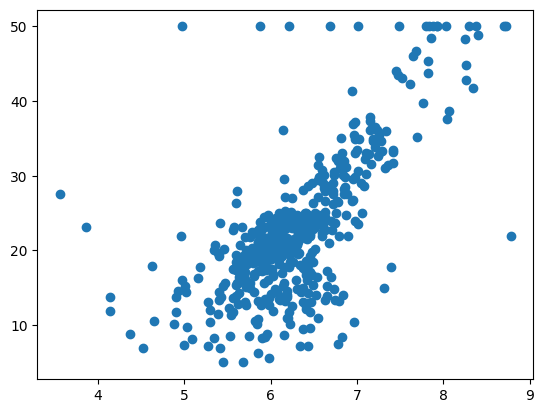

In [24]:
plt.scatter(df["RM"],df["MEDV"])
plt.show()

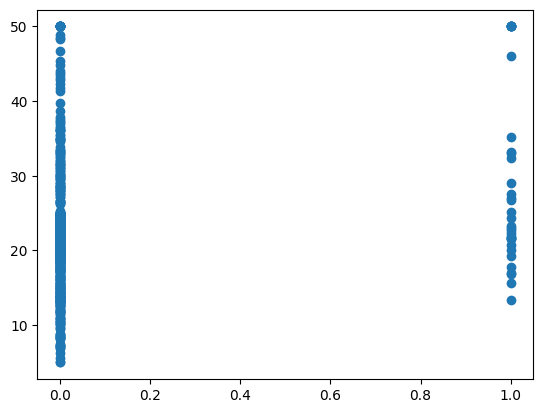

In [25]:
plt.scatter(df["CHAS"],df["MEDV"])
plt.show()

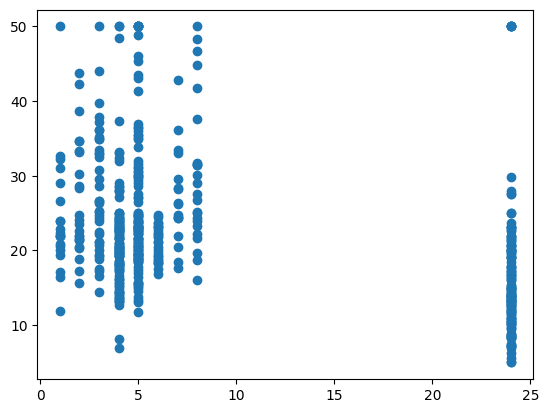

In [26]:
plt.scatter(df["RAD"],df["MEDV"])
plt.show()